**MNSIT** (Modified Nation Institute of Standards and Technology) is the most commonly used dataset for Digit recognition for Deep Learning because of its tens of thousands of handwritten images. it has total of 784 pixels each of 28 pixels in height and 28 pixels in width representing lightness or darkness of the picture


In [19]:
#installing the latest version of tensorflow
#!pip install --upgrade tensorflow

In [20]:
# verify for the verion updated
#!pip show tensorflow

**Importing, Normalizing and Defining the layers** 

In [21]:
# Importing the required libraries
import tensorflow as tf


# Import MNIST data
mnist = tf.keras.datasets.mnist

# Creating training and testing datasets
(x_train,y_train), (x_test,y_test) = mnist.load_data()

#Normalizing the datasets
x_train, x_test = tf.cast(x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)
y_train, y_test = tf.cast(y_train, tf.int64), tf.cast(y_test, tf.int64)

# Defining a Sequential Model
model = tf.keras.models.Sequential()

#Defining layers of the model
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [22]:
import numpy as np
np.max(x_train)

1.0

In [23]:
np.min(x_train)

0.0

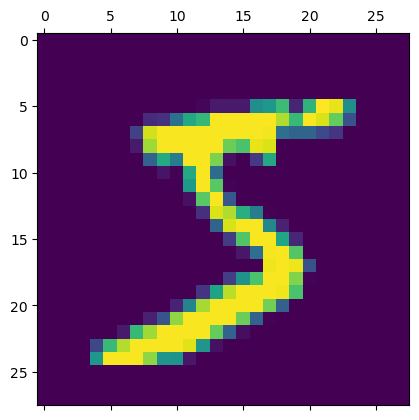

In [24]:
import matplotlib.pyplot as plt
plt.matshow(x_train[0])
plt.show()

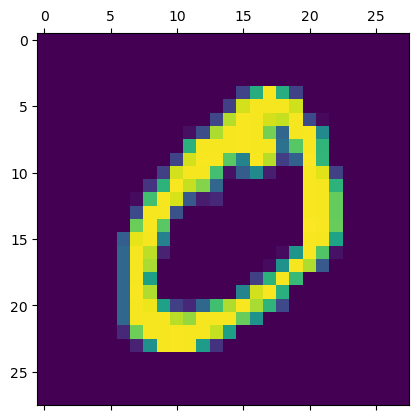

In [25]:
import matplotlib.pyplot as plt
plt.matshow(x_train[1])
plt.show()

In [26]:
y_train[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([5, 0], dtype=int64)>

In [27]:
x_train[0].shape

TensorShape([28, 28])

In [28]:
x_train.shape,x_test.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

**Compiling the Model**

In [29]:
#Compiling the Model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training the Model**

In [30]:
#Training the Model
history = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5794 - accuracy: 0.8490
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2812 - accuracy: 0.9198
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2283 - accuracy: 0.9342
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1944 - accuracy: 0.9442
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1693 - accuracy: 0.9514
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1503 - accuracy: 0.9578
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1354 - accuracy: 0.9616
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1228 - accuracy: 0.9656
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1120 - accuracy: 0.9682
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.102

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (32, 784)                 0         
                                                                 
 dense_3 (Dense)             (32, 256)                 200960    
                                                                 
 dense_4 (Dense)             (32, 128)                 32896     
                                                                 
 dense_5 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Evaluating the Model**

In [32]:
#Evaluating the Model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1093 - accuracy: 0.9665


[0.10933305323123932, 0.9664999842643738]

**Predicting using the Model**

In [33]:
#Making Prediction using the Model
import numpy as np
x_new = x_test[:10]
y_pred = model.predict(x_new)
print(y_pred)
#np.array(class_names)[y_red]
y_new = y_test[:10]
y_new

1/1 [==============================] - 0s 75ms/step
[[7.26713051e-06 4.52110072e-07 5.64789807e-04 1.03491638e-03
  8.57891536e-08 8.54314658e-06 3.75225240e-10 9.98331010e-01
  4.83076519e-06 4.81052557e-05]
 [1.19143617e-04 1.96520050e-04 9.98111725e-01 1.19810749e-03
  2.22097396e-10 3.80738347e-05 1.73584613e-05 8.48828119e-09
  3.19088227e-04 1.55355417e-09]
 [2.31898211e-05 9.91443813e-01 1.95026444e-03 5.04469208e-04
  1.91932428e-04 1.84183111e-04 3.80751037e-04 4.28535324e-03
  9.05358407e-04 1.30717512e-04]
 [9.99732077e-01 2.07003396e-07 7.20649405e-05 2.59584635e-06
  2.75643231e-07 7.32905028e-06 4.46212034e-05 5.04617128e-05
  4.95389997e-07 8.98726794e-05]
 [9.42603729e-05 3.20082961e-07 3.07321403e-04 6.98710528e-06
  9.77711558e-01 6.69652145e-05 1.37005918e-04 9.36542463e-04
  2.05785604e-04 2.05332432e-02]
 [2.72313514e-06 9.91457999e-01 2.76873354e-04 1.80486386e-04
  3.29019349e-05 7.35419644e-06 8.83474422e-06 7.73204910e-03
  1.88572638e-04 1.12335751e-04]
 [2.20

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)>

**Ploting Accuracy and Loss** 

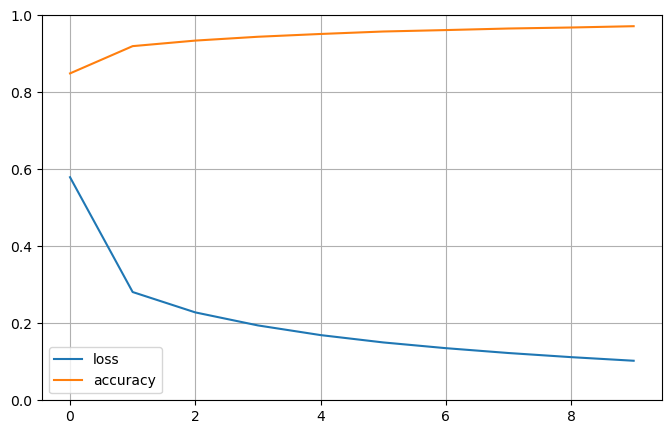

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()